### モデルのパラメータを変えたシミュレーションを行う
[JModelica User Guild - Version 2.10](https://jmodelica.org/downloads/UsersGuide-2.10.pdf)の5.4.2 を行います。

5.2 のVDPモデルについて、パラメータである初期値 $(x_1(0), x_2(0))$ を$(-3,0)$ から $(3,0)$ まで等間隔に変えた11ケースのシミュレーションを行い、各ケースの結果を１個の図にプロットします。横軸 $x_1$、縦軸 $x_2$ の図にすると、各ケースの結果はそれぞれ始点の異なる軌跡となります。 

必要となるモジュールをインポートします。

In [1]:
%matplotlib notebook
import numpy as N
import pylab as P
from pymodelica import compile_fmu
from pyfmi import load_fmu

VDP モデルをコンパイルし FMU を作成します。

In [2]:
# Define model file name and class name
model_name = 'VDP'
mofile = 'VDP.mo'
# Compile model
fmu_name = compile_fmu(model_name,mofile)

初期値 $(x_1(0), x_2(0))$ の配列を作ります。

In [3]:
# Define initial conditions
N_points = 11
x1_0 = N.linspace(-3.,3.,N_points)
x2_0 = N.zeros(N_points)

シミュレーションを実行します。 for ループ内が各ケースについての処理を表し、モデルのロード、初期値の設定、シミュレーションの実行、結果の取得、プロットを行っています。

<IPython.core.display.Javascript object>


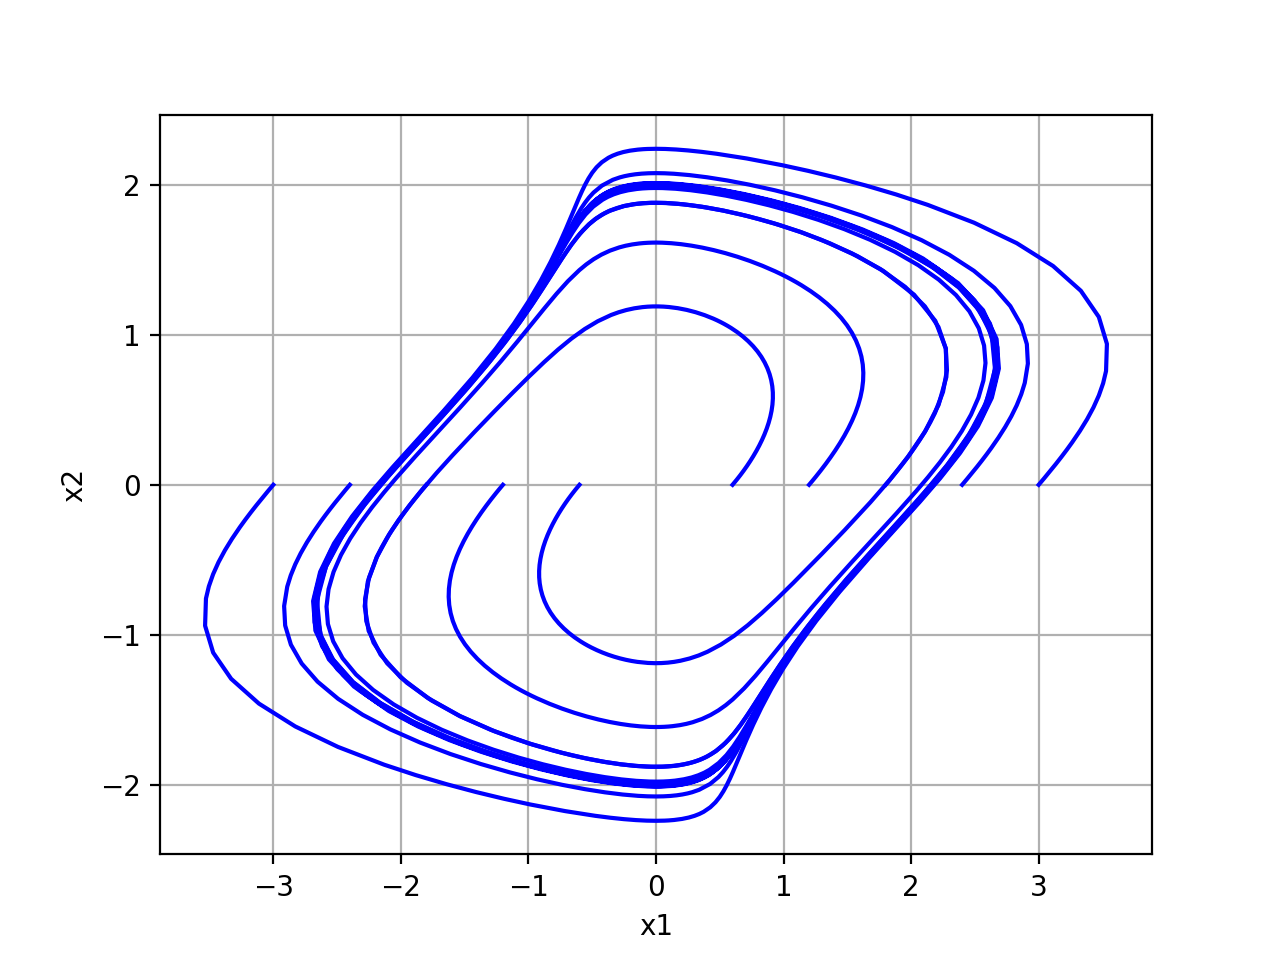

Final Run Statistics: --- 

 Number of steps                                 : 286
 Number of function evaluations                  : 432
 Number of Jacobian evaluations                  : 6
 Number of function eval. due to Jacobian eval.  : 12
 Number of error test failures                   : 32
 Number of nonlinear iterations                  : 428
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-06
 Tolerances (relative)    : 0.0001

Simulation interval    : 0.0 - 20.0 seconds.
Elapsed simulation time: 0.0162968635559 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 299
 Number of function evaluations                  : 428
 Number of Jacobian evaluations                  : 6
 Number of function eval. due to Jacobian eval.  : 12


In [4]:
fig = P.figure()
P.clf()
# P.hold(True)
P.xlabel('x1')
P.ylabel('x2')

for i in range(N_points):
      # Load model
      vdp = load_fmu(fmu_name)
      # Set initial conditions in model
      vdp.set('x1_0',x1_0[i])
      vdp.set('x2_0',x2_0[i])
      # Simulate
      res = vdp.simulate(final_time=20)
      # Get simulation result
      x1=res['x1']
      x2=res['x2']
      # Plot simulation result in phase plane plot
      P.plot(x1, x2,'b')
P.grid()
P.show()